# **Regresssion**

##### Dataset used: [*Forest Fire Regression*](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)

We are using the statistics received from the UCI Machine Learning Repository for the details of forest-fires to obtain a suitable regression model for the data, using different machine learning regression models:
1. Linear Regression
2. Random Forest Regression
3. Decision Tree Regression
4. KNN Regression
5. Support Vector Machine

to analyze various parameters like:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Squared Error (R2_Score)

The approach followed for the same would be:
- Data pre-processing
- Selecting the model
- Training the model
- Testing the model

 ---
For data pre-processing, we use the csv file and get the values as a NumPy array in order to extract the features/independent variables as follows:



```
X = dataset.iloc[:, 0:12].values
```


### Attributes
Spatial Attributes (S)
- X : x-axis coordinate
- Y : y-axis coordinate

Temporal Attributes (T)
- month : Month of the year (January to December)
- day : Day of the week (Monday to Sunday)

Fire Weather Index Attributes (FWI)
- FFMC : Fine Fuel Moisture Code
- DMC : Duff Moisture Code
- DC : Drought Code
- ISI : Initial Spread Index

Weather/Meteorological Attributes (M)
- temp : Outside temperature (in Celsius)
- RH : Outside relative humidity (in percentage)
- wind : Outside wind speed (in kilometer per hour)
- rain : Outside rain (in millimeter per square meter)


### Target Variable
- area : Total burned area (in ha)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("forestfires.csv")  #import the csv dataset
X = dataset.iloc[:, 0:12].values #helps figure out the features/independent variables
y = dataset.iloc[:, 12].values #helps figure out the dependent/target variable
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


##Encoding Categorical Data

We use **OneHotEncoder, LabelEncoder** for encoding categorical columns like **"month"** and **"day"**.
Followed by combining them using **Column Transformer**.

We have the columns: "month" and "day", which are categorical, and are accordingly transformed using the ColumnTransformer after encoding.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode categorical columns using LabelEncoder
labelencoder_X_1 = LabelEncoder()
#Fit and Transform the data in 2nd column: "month"
#Replaces the categorical values with their corresponding numerical labels
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2])

#Fit and Transform the data in 3rd column: "day"
#Replaces the categorical values with their corresponding numerical labels
labelencoder_X_2 = LabelEncoder()
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3])

#applies the transformation to 2nd and 3rd column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat1', OneHotEncoder(), [2]),
        ('cat2', OneHotEncoder(), [3])
    ],
    remainder='passthrough' #ignore the remaining(not mentioned) columns
)

X = preprocessor.fit_transform(X) #Applies the transformations to the given matrix


##Splitting the dataset

80% of total data is used for training, while remaining 20% is used for testing.

In [ ]:
from sklearn.model_selection import train_test_split
#20% of the total data is used for testing, and remaining is used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #scaled and transformed data is stored in the training data
X_test = sc.transform(X_test) #transformed data stored in testing data using the parameters learned from trainig data instead of re-computing them


We evaluate the model to obtain the features like:
- MSE (Mean squared error)
- MAE (Mean absolute error)
- R2_Score (Root-squared score)

##**Linear Regression**

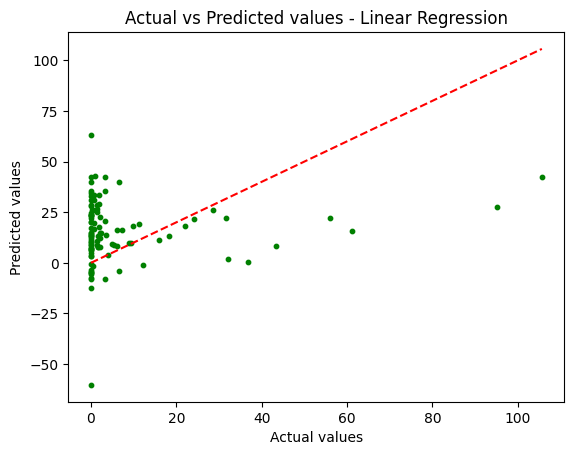

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

errors = np.abs(y_test - y_test_pred)
threshold = 300

filtered_indices = np.where(errors < threshold)
filtered_y_test = y_test[filtered_indices]
filtered_y_pred = y_test_pred[filtered_indices]

plt.scatter(filtered_y_test, filtered_y_pred, color='green', s=10)
plt.plot([min(filtered_y_test), max(filtered_y_test)], [min(filtered_y_test), max(filtered_y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - Linear Regression')
plt.show()

Here, we got the graph for **Linear regression**, where the predicted values obtained from the model are plotted against the real values.


MSE = 5667.431837833332
MAE = 24.664548551119292
R2 Score = -0.03035913243487931



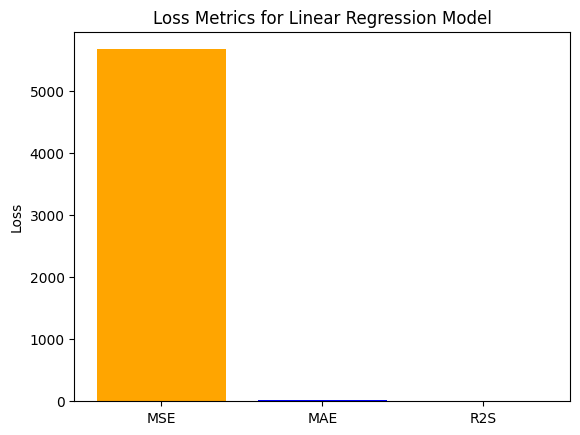

In [ ]:
#Evaluating the errors
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2s

mse_val = mse(y_test, y_test_pred)
mae_val = mae(y_test, y_test_pred)
r2s_val = r2s(y_test, y_test_pred)

linear_losses = {
    'MSE' : mse_val,
    'MAE' : mae_val,
    'R2S' : r2s_val
}

print('')
print('MSE =', mse_val)
print('MAE =', mae_val)
print('R2 Score =', r2s_val)
print('')

plt.bar(linear_losses.keys(), linear_losses.values(), color=['orange', 'blue', 'green'])
plt.ylabel('Loss')
plt.title('Loss Metrics for Linear Regression Model')
plt.yscale('linear')
plt.show()

Here, we obtain the errors for the Linear Regression model.

For the Linear Regression model, the results thus obtained are as follows:

* *MSE* = 5667.431837833332
* *MAE* = 24.664548551119292
* *R2S* = -0.03035913243487931

MSE (Training): 3500.3695013226516
MSE (Testing): 5569.998712195312

MAE (Training): 18.500086512447158
MAE (Testing): 23.558986522623737

R2S (Training): 0.04804495254433261
R2S (Testing): -0.012645445940647315

The model may be overfitting.

Original Model Performance:
Training MSE = 3461.9476473162777
Testing MSE = 5667.431837833332

Best Alpha: 15.0

Tuned Model Performance:
Training MSE = 3500.369501322652
Testing MSE = 5569.998712192808



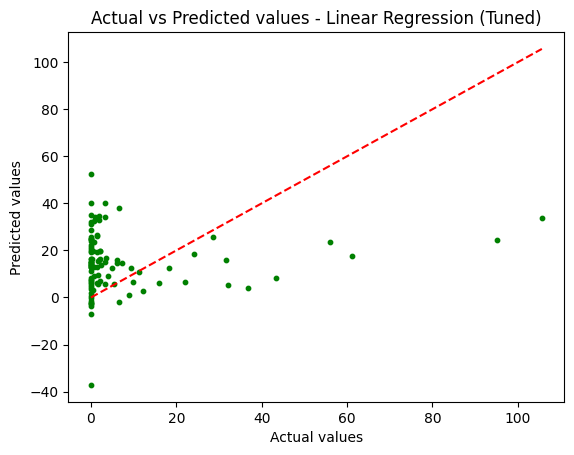

In [ ]:
#Overfitting / Underfitting
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


#Tune Hyperparameters
# Define a range of alpha values to try
alphas = [0.01, 0.1, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0, 15.0]

ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)

#Check for Overfitting/Underfitting
y_train_pred_ridge = ridge_cv.predict(X_train)
y_test_pred_ridge = ridge_cv.predict(X_test)

mse_train_ridge = mse(y_train, y_train_pred_ridge)
mse_test_ridge = mse(y_test, y_test_pred_ridge)

mae_train_ridge = mae(y_train, y_train_pred_ridge)
mae_test_ridge = mae(y_test, y_test_pred_ridge)

r2s_train_ridge = r2s(y_train, y_train_pred_ridge)
r2s_test_ridge = r2s(y_test, y_test_pred_ridge)

print("MSE (Training):", mse_train_ridge)
print("MSE (Testing):", mse_test_ridge)
print('')
print("MAE (Training):", mae_train_ridge)
print("MAE (Testing):", mae_test_ridge)
print('')
print("R2S (Training):", r2s_train_ridge)
print("R2S (Testing):", r2s_test_ridge)


# Check for overfitting/underfitting
mse_diff_ridge = mse_train_ridge - mse_test_ridge
if mse_diff_ridge < 0:
    print("\nThe model may be overfitting.")
elif mse_diff_ridge > 0:
    print("\nThe model may be underfitting.")
else:
    print("\nThe model is performing similarly on both sets.")


print('')
print('Original Model Performance:')
print('Training MSE =', mse(y_train, model.predict(X_train)))
print('Testing MSE =', mse(y_test, y_test_pred))
print('')

best_alpha = ridge_cv.alpha_
print('Best Alpha:', best_alpha)

#Regularization
ridge_model_tuned = Ridge(alpha=best_alpha)
ridge_model_tuned.fit(X_train, y_train)

y_train_pred_tuned = ridge_model_tuned.predict(X_train)
y_test_pred_tuned = ridge_model_tuned.predict(X_test)

#Evaluate Tuned Model
print('\nTuned Model Performance:')
print('Training MSE =', mse(y_train, y_train_pred_tuned))
print('Testing MSE =', mse(y_test, y_test_pred_tuned))
print('')

# Plot Actual vs Predicted values for the tuned model
plt.scatter(y_test[filtered_indices], y_test_pred_tuned[filtered_indices], color='green', s=10)
plt.plot([min(y_test[filtered_indices]), max(y_test[filtered_indices])], [min(y_test[filtered_indices]), max(y_test[filtered_indices])], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - Linear Regression (Tuned)')
plt.show()


From the observations above, we can notice that:

* **Overfitting** : The model performed poorly in testing, as compared to its performance while training, clearly shown by the difference in training and testing errors

* **Model Tuning** : The model was tuned with suitable alpha value, from a range of different alphas, to obtain better performance in testing data

##**Decision Tree**

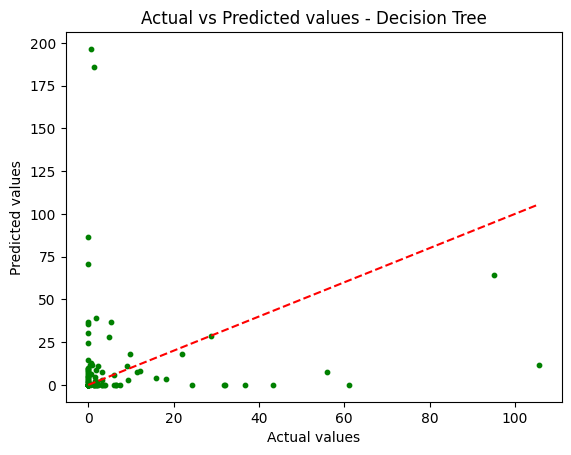

In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor as dtr
reg = dtr()
reg.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)

errors = np.abs(y_test - y_test_pred)
threshold = 300

filtered_indices = np.where(errors < threshold)
filtered_y_test = y_test[filtered_indices]
filtered_y_pred = y_test_pred[filtered_indices]

plt.scatter(filtered_y_test, filtered_y_pred, color='green', s=10)
plt.plot([min(filtered_y_test), max(filtered_y_test)], [min(filtered_y_test), max(filtered_y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - Decision Tree')
plt.show()

Here, we got the graph for **Decision tree**, where the predicted values obtained from the model are plotted against the real values.


MSE = 5667.431837833332
MAE = 24.664548551119292
R2 Score = -0.03035913243487931



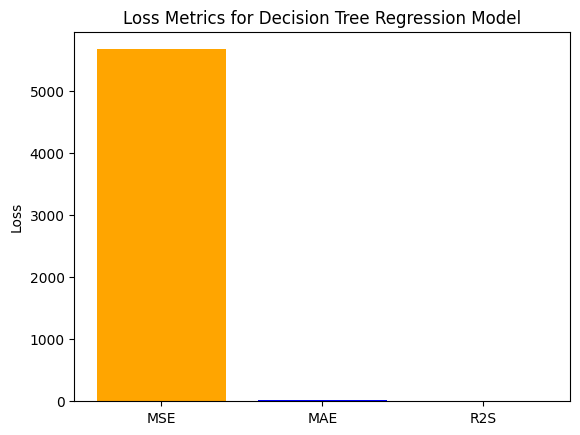

In [ ]:
#Evaluating the errors
mse_val = mse(y_test, y_test_pred)
mae_val = mae(y_test, y_test_pred)
r2s_val = r2s(y_test, y_test_pred)

decision_tree_losses = {
    'MSE' : mse_val,
    'MAE' : mae_val,
    'R2S' : r2s_val
}

print('')
print('MSE =', mse_val)
print('MAE =', mae_val)
print('R2 Score =', r2s_val)
print('')

plt.bar(decision_tree_losses.keys(), decision_tree_losses.values(), color=['orange', 'blue', 'green'])
plt.ylabel('Loss')
plt.title('Loss Metrics for Decision Tree Regression Model')
plt.yscale('linear')
plt.show()

For the Decision Tree Regression model, the results thus obtained are as follows:

* *MSE* = 5667.431837833332
* *MAE* = 24.664548551119292
* *R2S* = -0.03035913243487931


The model may be overfitting.

Fitting 5 folds for each of 160 candidates, totalling 800 fits

Original Model Performance:
Training MSE = 0.30304370460048424
Testing MSE = 5667.431837833332

Training MAE = 0.07087167070217917
Testing MAE = 24.664548551119292

Training R2S = 0.9999175847052475
Testing R2S = -0.03035913243487931

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

Tuned Model Performance:
Training MSE = 3339.0236963110783
Testing MSE = 5877.987655211792

Training MAE = 17.985908999112805
Testing MAE = 21.723419107469624

Training R2 Score = 0.09192430682636721
Testing R2 Score = -0.06863892397554405



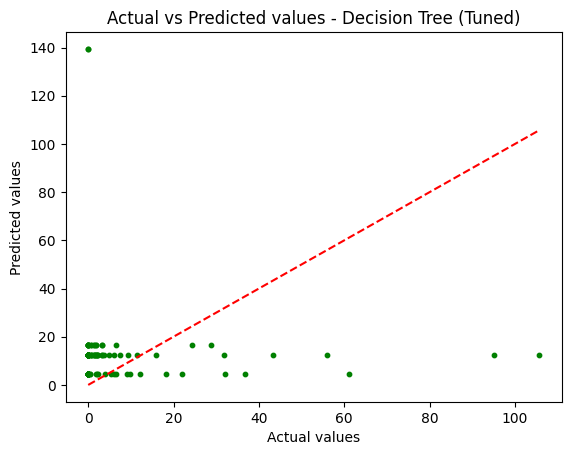

In [ ]:
from sklearn.model_selection import GridSearchCV

y_train_pred = reg.predict(X_train)

mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)

r2s_train = r2s(y_train, y_train_pred)
r2s_test = r2s(y_test, y_test_pred)

# Check for overfitting/underfitting
mse_diff = mse_train - mse_test
if mse_diff < 0:
    print("The model may be overfitting.")
elif mse_diff > 0:
    print("The model may be underfitting.")
else:
    print("The model is performing similarly on both sets.")

print('')

param_grid = {
    'max_depth': [None, 2, 4, 5, 7, 8, 10, 15],
    'min_samples_split': [2, 5, 8, 10, 12],
    'min_samples_leaf': [2, 4, 5, 6]
}

grid_search = GridSearchCV(estimator=dtr(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search.fit(X_train, y_train)

print('')
print('Original Model Performance:')
print('Training MSE =', mse_train)
print('Testing MSE =', mse_test)
print('')
print('Training MAE =', mae_train)
print('Testing MAE =', mae_test)
print('')
print('Training R2S =', r2s_train)
print('Testing R2S =', r2s_test)
print('')

best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Evaluate Tuned Model
reg_tuned = dtr(random_state=42, **best_params)
reg_tuned.fit(X_train, y_train)

y_train_pred_tuned = reg_tuned.predict(X_train)
y_test_pred_tuned = reg_tuned.predict(X_test)

print('\nTuned Model Performance:')
print('Training MSE =', mse(y_train, y_train_pred_tuned))
print('Testing MSE =', mse(y_test, y_test_pred_tuned))
print('')
print('Training MAE =', mae(y_train, y_train_pred_tuned))
print('Testing MAE =', mae(y_test, y_test_pred_tuned))
print('')
print('Training R2 Score =', r2s(y_train, y_train_pred_tuned))
print('Testing R2 Score =', r2s(y_test, y_test_pred_tuned))
print('')

# Plot Actual vs Predicted values for the tuned model
plt.scatter(y_test[filtered_indices], y_test_pred_tuned[filtered_indices], color='green', s=10)
plt.plot([min(y_test[filtered_indices]), max(y_test[filtered_indices])], [min(y_test[filtered_indices]), max(y_test[filtered_indices])], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - Decision Tree (Tuned)')
plt.show()


From the observations above, we can notice that:

* **Overfitting** : The model performed poorly in testing, as compared to its performance while training, clearly shown by the difference in training and testing errors

* **Model Tuning** : After tuning, the model performed poorly in both, testing as well as training, indicating that the parameter tuning was erroneous.
So, we were not able to tune it well

##**Random Forest**

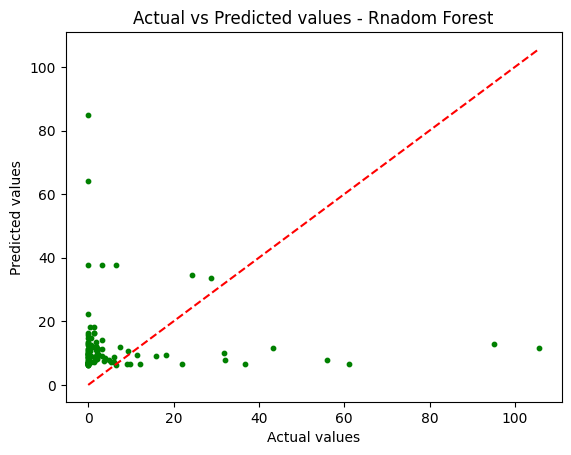

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, n_estimators=100)
regr.fit(X_train, y_train)

y_test_pred = regr.predict(X_test)

errors = np.abs(y_test - y_test_pred)
threshold = 300

filtered_indices = np.where(errors < threshold)
filtered_y_test = y_test[filtered_indices]
filtered_y_pred = y_test_pred[filtered_indices]

plt.scatter(filtered_y_test, filtered_y_pred, color='green', s=10)
plt.plot([min(filtered_y_test), max(filtered_y_test)], [min(filtered_y_test), max(filtered_y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - Rnadom Forest')
plt.show()


MSE = 5624.3519417529005
MAE = 20.547060882105537
R2 Score = -0.022527055116453587



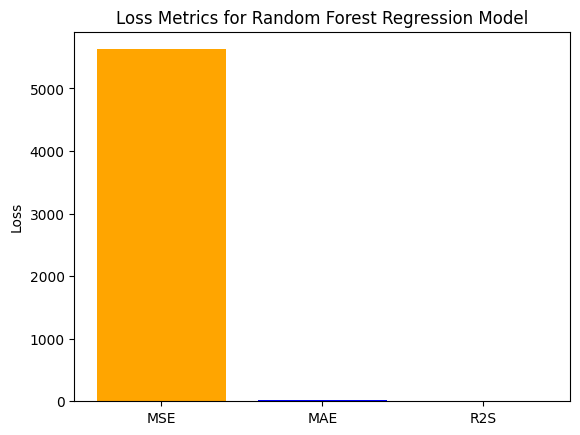

In [ ]:
mse_val = mse(y_test, y_test_pred)
mae_val = mae(y_test, y_test_pred)
r2s_val = r2s(y_test, y_test_pred)

random_forest_losses = {
    'MSE' : mse_val,
    'MAE' : mae_val,
    'R2S' : r2s_val
}

print('')
print('MSE =', mse_val)
print('MAE =', mae_val)
print('R2 Score =', r2s_val)
print('')

plt.bar(random_forest_losses.keys(), random_forest_losses.values(), color=['orange', 'blue', 'green'])
plt.ylabel('Loss')
plt.title('Loss Metrics for Random Forest Regression Model')
plt.yscale('linear')
plt.show()

For the Random Forest Regression model, the results thus obtained are as follows:

* *MSE* = 5624.3519417529005
* *MAE* = 20.547060882105537
* *R2S* = -0.022527055116453587

The model may be overfitting.

Fitting 5 folds for each of 600 candidates, totalling 3000 fits

Original Model Performance:
Training MSE = 1894.2722356689808
Testing MSE = 5698.213286576924

Training MAE = 15.963584569318776
Testing MAE = 19.051942307692308

Training R2S = 0.48483666786639634
Testing R2S = -0.0359553085742752

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}

Tuned Model Performance:
Training MSE = 2836.0850394269746
Testing MSE = 5612.95995015265

Training MAE = 16.33314557081872
Testing MAE = 22.48241181898117

Training R2 Score = 0.22870272201953068
Testing R2 Score = -0.020455950793048627



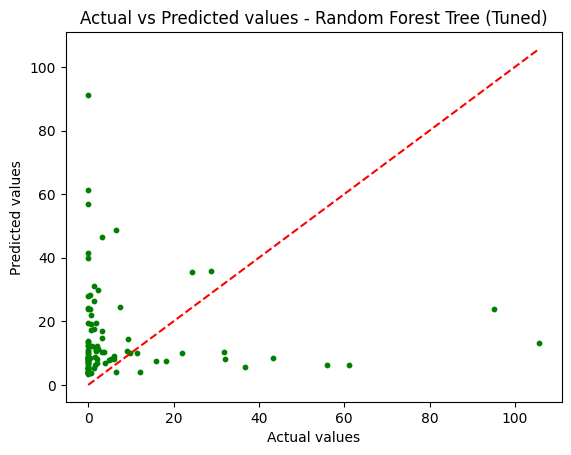

In [ ]:
from sklearn.model_selection import GridSearchCV

y_train_pred = regr.predict(X_train)

mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)

r2s_train = r2s(y_train, y_train_pred)
r2s_test = r2s(y_test, y_test_pred)

# Check for overfitting/underfitting
mse_diff = mse_train - mse_test
if mse_diff < 0:
    print("The model may be overfitting.")
elif mse_diff > 0:
    print("The model may be underfitting.")
else:
    print("The model is performing similarly on both sets.")

print('')

param_grid = {
    'max_depth': [None, 2, 4, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'n_estimators': [50, 70, 100, 150]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search.fit(X_train, y_train)

print('')
print('Original Model Performance:')
print('Training MSE =', mse_train)
print('Testing MSE =', mse_test)
print('')
print('Training MAE =', mae_train)
print('Testing MAE =', mae_test)
print('')
print('Training R2S =', r2s_train)
print('Testing R2S =', r2s_test)
print('')

best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Evaluate Tuned Model
regr_tuned = RandomForestRegressor(random_state=42, **best_params)
regr_tuned.fit(X_train, y_train)

# Predictions
y_train_pred_tuned = regr_tuned.predict(X_train)
y_test_pred_tuned = regr_tuned.predict(X_test)

# Evaluate tuned model
print('\nTuned Model Performance:')
print('Training MSE =', mse(y_train, y_train_pred_tuned))
print('Testing MSE =', mse(y_test, y_test_pred_tuned))
print('')
print('Training MAE =', mae(y_train, y_train_pred_tuned))
print('Testing MAE =', mae(y_test, y_test_pred_tuned))
print('')
print('Training R2 Score =', r2s(y_train, y_train_pred_tuned))
print('Testing R2 Score =', r2s(y_test, y_test_pred_tuned))
print('')

# Plot Actual vs Predicted values for the tuned model
plt.scatter(y_test[filtered_indices], y_test_pred_tuned[filtered_indices], color='green', s=10)
plt.plot([min(y_test[filtered_indices]), max(y_test[filtered_indices])], [min(y_test[filtered_indices]), max(y_test[filtered_indices])], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - Random Forest Tree (Tuned)')
plt.show()

From the observations above, we can notice that:

* **Overfitting** : The model performed poorly in testing, as compared to its performance while training, clearly shown by the difference in training and testing errors

* **Model Tuning** : After tuning, the model performed poorly in both, testing as well as training, indicating that the parameter tuning was erroneous.
So, we were not able to tune it well

##**K-Nearest Neighbors**

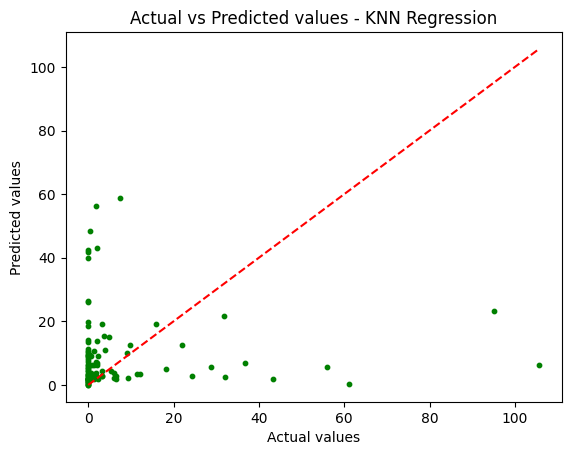

In [ ]:
#KNN REGRESSION
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Specify number of neighbors (K)
# knn_regressor = KNeighborsRegressor(n_neighbors=4)
# knn_regressor = KNeighborsRegressor(n_neighbors=7)
knn_regressor.fit(X_train, y_train)

y_test_pred = knn_regressor.predict(X_test)

errors = np.abs(y_test - y_test_pred)
threshold = 300

filtered_indices = np.where(errors < threshold)
filtered_y_test = y_test[filtered_indices]
filtered_y_pred = y_test_pred[filtered_indices]

plt.scatter(filtered_y_test, filtered_y_pred, color='green', s=10)
plt.plot([min(filtered_y_test), max(filtered_y_test)], [min(filtered_y_test), max(filtered_y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - KNN Regression')
plt.show()



MSE = 5698.213286576924
MAE = 19.051942307692308
R2 Score = -0.0359553085742752



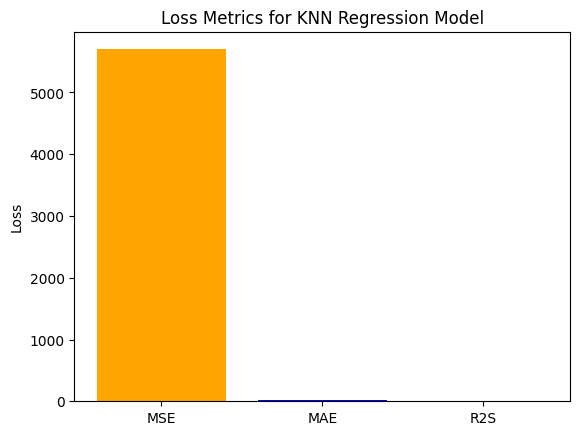

In [ ]:
mse_val = mse(y_test, y_test_pred)
mae_val = mae(y_test, y_test_pred)
r2s_val = r2s(y_test, y_test_pred)

knn_losses = {
    'MSE' : mse_val,
    'MAE' : mae_val,
    'R2S' : r2s_val
}

print('')
print("MSE =", mse_val)
print("MAE =", mae_val)
print("R2 Score =", r2s_val)
print('')

plt.bar(knn_losses.keys(), knn_losses.values(), color=['orange', 'blue', 'green'])
plt.ylabel('Loss')
plt.title('Loss Metrics for KNN Regression Model')
plt.yscale('linear')
plt.show()

For the K-Nearest Neighbors Regression model, the results thus obtained are as follows:

* *MSE* = 5698.213286576924
* *MAE* = 19.051942307692308
* *R2S* = -0.0359553085742752

The model may be overfitting.

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Original Model Performance:
Training MSE = 2596.685928474577
Testing MSE = 5698.213286576924

Training MAE = 14.844895883777237
Testing MAE = 19.051942307692308

Training R2S = 0.29380933203353676
Testing R2S = -0.0359553085742752

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Tuned Model Performance:
Training MSE = 2873.345942407471
Testing MSE = 5699.036777138933

Training MAE = 15.825371843652714
Testing MAE = 19.089024725274722

Training R2 Score = 0.21856930477554082
Testing R2 Score = -0.03610502206802679



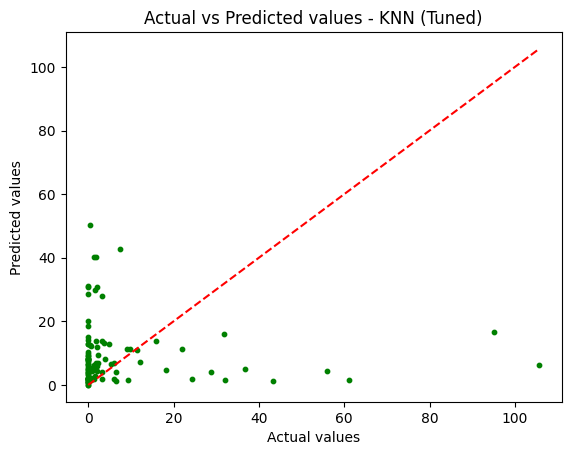

In [ ]:
y_train_pred = knn_regressor.predict(X_train)

mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)

r2s_train = r2s(y_train, y_train_pred)
r2s_test = r2s(y_test, y_test_pred)

# Check for overfitting/underfitting
mse_diff = mse_train - mse_test
if mse_diff < 0:
    print("The model may be overfitting.")
elif mse_diff > 0:
    print("The model may be underfitting.")
else:
    print("The model is performing similarly on both sets.")

print('')

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=KNeighborsRegressor(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search.fit(X_train, y_train)

print('')
print('Original Model Performance:')
print('Training MSE =', mse_train)
print('Testing MSE =', mse_test)
print('')
print('Training MAE =', mae_train)
print('Testing MAE =', mae_test)
print('')
print('Training R2S =', r2s_train)
print('Testing R2S =', r2s_test)
print('')

best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Evaluate Tuned Model
knn_tuned = KNeighborsRegressor(**best_params)
knn_tuned.fit(X_train, y_train)

# Predictions
y_train_pred_tuned = knn_tuned.predict(X_train)
y_test_pred_tuned = knn_tuned.predict(X_test)

# Evaluate tuned model
print('\nTuned Model Performance:')
print('Training MSE =', mse(y_train, y_train_pred_tuned))
print('Testing MSE =', mse(y_test, y_test_pred_tuned))
print('')
print('Training MAE =', mae(y_train, y_train_pred_tuned))
print('Testing MAE =', mae(y_test, y_test_pred_tuned))
print('')
print('Training R2 Score =', r2s(y_train, y_train_pred_tuned))
print('Testing R2 Score =', r2s(y_test, y_test_pred_tuned))
print('')

# Plot Actual vs Predicted values for the tuned model
plt.scatter(y_test[filtered_indices], y_test_pred_tuned[filtered_indices], color='green', s=10)
plt.plot([min(y_test[filtered_indices]), max(y_test[filtered_indices])], [min(y_test[filtered_indices]), max(y_test[filtered_indices])], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - KNN (Tuned)')
plt.show()

From the observations above, we can notice that:

* **Overfitting** : The model performed poorly in testing, as compared to its performance while training, clearly shown by the difference in training and testing errors


### **for n=5**

The model may be overfitting.

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Original Model Performance: <br />
Training MSE = 2596.685928474577<br />
Testing MSE = 5698.213286576924<br />

Training MAE = 14.844895883777237<br />
Testing MAE = 19.051942307692308<br />

Training R2S = 0.29380933203353676<br />
Testing R2S = -0.0359553085742752<br />

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Tuned Model Performance:<br />
Training MSE = 2873.345942407471<br />
Testing MSE = 5699.036777138933<br />

Training MAE = 15.825371843652714<br />
Testing MAE = 19.089024725274722<br />

Training R2 Score = 0.21856930477554082<br />
Testing R2 Score = -0.03610502206802679<br />



### **for n=4**

The model may be overfitting.

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Original Model Performance:<br />
Training MSE = 2535.0448827784503<br />
Testing MSE = 5790.978227704327<br />

Training MAE = 14.829975786924939<br />
Testing MAE = 18.615312499999998<br />

Training R2S = 0.31057313498596795<br />
Testing R2S = -0.05282030263072701<br />

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Tuned Model Performance:<br />
Training MSE = 2873.345942407471<br />
Testing MSE = 5699.036777138933<br />

Training MAE = 15.825371843652714<br />
Testing MAE = 19.089024725274722<br />

Training R2 Score = 0.21856930477554082<br />
Testing R2 Score = -0.03610502206802679<br />


### **for n=7**
The model may be overfitting.

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Original Model Performance:<br />
Training MSE = 2851.5709564263475<br />
Testing MSE = 5704.511955455259<br />

Training MAE = 15.766537530266344<br />
Testing MAE = 19.045934065934066<br />

Training R2S = 0.224491196108777<br />
Testing R2S = -0.03710042883097642<br />

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

Tuned Model Performance:<br />
Training MSE = 2873.345942407471<br />
Testing MSE = 5699.036777138933<br />

Training MAE = 15.825371843652714<br />
Testing MAE = 19.089024725274722<br />

Training R2 Score = 0.21856930477554082<br />
Testing R2 Score = -0.03610502206802679


---

<br />

From above observations, we can conclude, that the model performed its best for **n=4**, where n denotes the neighbors count.



##**Support Vector Machine**

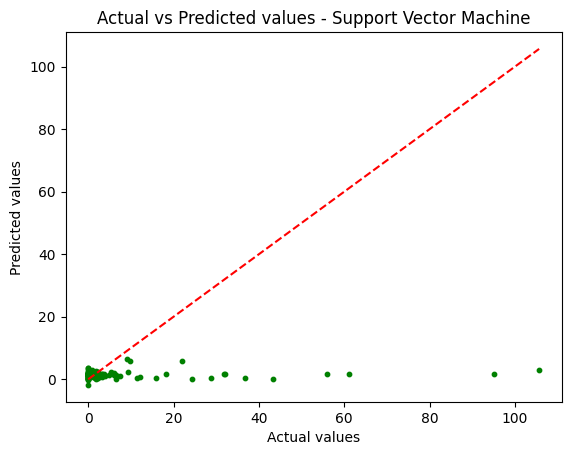

In [ ]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

y_test_pred = svm_regressor.predict(X_test)

errors = np.abs(y_test - y_test_pred)
threshold = 300

filtered_indices = np.where(errors < threshold)
filtered_y_test = y_test[filtered_indices]
filtered_y_pred = y_test_pred[filtered_indices]

plt.scatter(filtered_y_test, filtered_y_pred, color='green', s=10)
plt.plot([min(filtered_y_test), max(filtered_y_test)], [min(filtered_y_test), max(filtered_y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - Support Vector Machine')
plt.show()


MSE = 5660.99893137909
MAE = 14.087857165659859
R2 Score = -0.029189607312586574



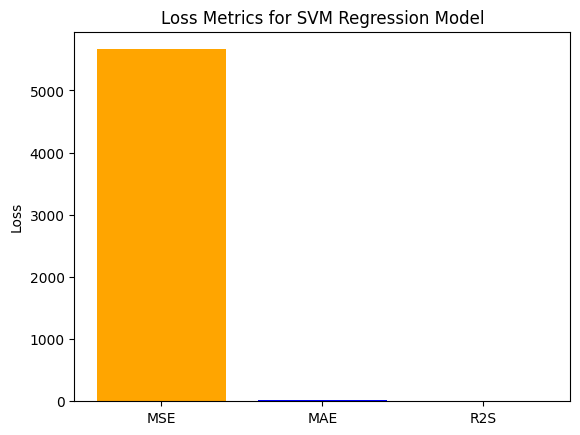

In [ ]:
mse_val = mse(y_test, y_test_pred)
mae_val = mae(y_test, y_test_pred)
r2s_val = r2s(y_test, y_test_pred)

svm_losses = {
    'MSE' : mse_val,
    'MAE' : mae_val,
    'R2S' : r2s_val
}

print('')
print("MSE =", mse_val)
print("MAE =", mae_val)
print("R2 Score =", r2s_val)
print('')

plt.bar(svm_losses.keys(), svm_losses.values(), color=['orange', 'blue', 'green'])
plt.ylabel('Loss')
plt.title('Loss Metrics for SVM Regression Model')
plt.yscale('linear')
plt.show()

For the Support Vector Machine Regression model, the results thus obtained are as follows:

* *MSE* = 5660.99893137909
* *MAE* = 14.087857165659859
* *R2S* = -0.029189607312586574



The model may be overfitting.

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Original Model Performance:
Training MSE = 2596.685928474577
Testing MSE = 5660.99893137909

Training MAE = 14.844895883777237
Testing MAE = 14.087857165659859

Training R2S = 0.29380933203353676
Testing R2S = -0.029189607312586574

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Tuned Model Performance:
Training MSE = 3598.427945250073
Testing MSE = 5603.499848298725

Training MAE = 9.360994403803115
Testing MAE = 14.737213239587486

Training R2 Score = 0.021377130588083437
Testing R2 Score = -0.018736070851328446



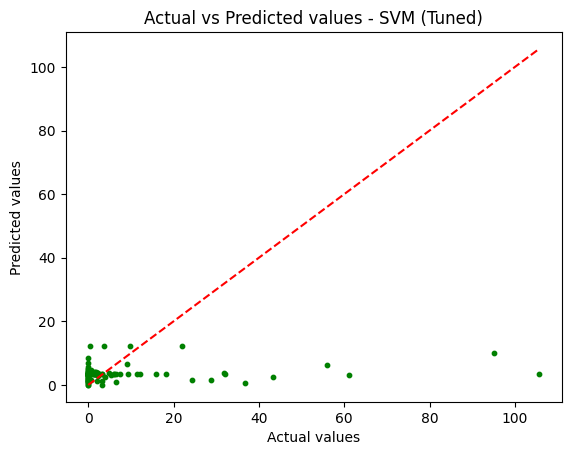

In [ ]:
y_train_pred = knn_regressor.predict(X_train)

mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)

mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)

r2s_train = r2s(y_train, y_train_pred)
r2s_test = r2s(y_test, y_test_pred)

# Check for overfitting/underfitting
mse_diff = mse_train - mse_test
if mse_diff < 0:
    print("The model may be overfitting.")
elif mse_diff > 0:
    print("The model may be underfitting.")
else:
    print("The model is performing similarly on both sets.")

print('')

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=SVR(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search.fit(X_train, y_train)

print('')
print('Original Model Performance:')
print('Training MSE =', mse_train)
print('Testing MSE =', mse_test)
print('')
print('Training MAE =', mae_train)
print('Testing MAE =', mae_test)
print('')
print('Training R2S =', r2s_train)
print('Testing R2S =', r2s_test)
print('')

best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Evaluate Tuned Model
svm_tuned = SVR(**best_params)
svm_tuned.fit(X_train, y_train)

# Predictions
y_train_pred_tuned = svm_tuned.predict(X_train)
y_test_pred_tuned = svm_tuned.predict(X_test)

# Evaluate tuned model
print('\nTuned Model Performance:')
print('Training MSE =', mse(y_train, y_train_pred_tuned))
print('Testing MSE =', mse(y_test, y_test_pred_tuned))
print('')
print('Training MAE =', mae(y_train, y_train_pred_tuned))
print('Testing MAE =', mae(y_test, y_test_pred_tuned))
print('')
print('Training R2 Score =', r2s(y_train, y_train_pred_tuned))
print('Testing R2 Score =', r2s(y_test, y_test_pred_tuned))
print('')

# Plot Actual vs Predicted values for the tuned model
plt.scatter(y_test[filtered_indices], y_test_pred_tuned[filtered_indices], color='green', s=10)
plt.plot([min(y_test[filtered_indices]), max(y_test[filtered_indices])], [min(y_test[filtered_indices]), max(y_test[filtered_indices])], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values - SVM (Tuned)')
plt.show()

From the observations above, we can notice that:

* **Overfitting** : The model performed poorly in testing, as compared to its performance while training, clearly shown by the difference in training and testing errors

* **Model Tuning** : After tuning, the model performed poorly in both, testing as well as training, indicating that the parameter tuning was erroneous.
So, we were not able to tune it well

## OUTPUT COMPARISON TEXT

---
| Model/Errors|LR | DT | RF | KNN | SVM |
| ------------|-------|---------------|---------------|-----|-----|
| MSE (Train) |3500.36       |0.3030               |1894.27               |2535.04     |2596.68     |
| MAE (Train) |18.5000       |0.0708               |15.9635               |14.8299     |14.8448     |
| R2S (Train) |0.0480       |0.9999               |0.4843               |0.3105     |0.0293     |
| MSE (Test)  |5569.99       |5667.43               |5698.21               |5790.97     |5660.99
| MAE (Test)  |23.5589       |24.6645               |19.0519               |18.6153     |14.0878     |
| R2S (Test)  |-0.0126       |-0.0303               |-0.0359               |-0.0528    |-0.0291     |

---
---
After comparing the results obtained from all the above models, we can observe that for training data, the performance of models is as follows:

```
Decision Tree > Random Forest > KNN(n=4) > SVM > Linear regression
```
But when we compare for the testing data, we see a change in the performance, where decision tree fails badly.

For testing data, we have:

```
SVM > Random Forest > KNN(n=4) > Linear Regression > Decision Tree
```
So overall, we may conclude that best model for fire forest regression is : **SVM**
